In [80]:
#importing all libraries we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, train_test_split
from sklearn import linear_model, tree, ensemble

In [3]:
#importing our dataset
#datast provied by the mainflow company

df = pd.read_csv(r"C:\\Users\\ASUS\Downloads\\heart.csv")

In [4]:
#checking first five rows by calling df.head()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
#take a look at the column names
df.columns.values

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype=object)

In [8]:
df.info

<bound method DataFrame.info of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2

In [10]:
df.describe() #descriptive statistics

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df1 = df.drop_duplicates()
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [16]:
#filling null value, 2nd method, forward filling
df1 = df.fillna(method='pad') 
df1

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24496\742468193.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1 = df.fillna(method='pad')


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [12]:
df1.isnull().sum() #how many null value prestent in column

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.isnull().sum() #how many null value prestent in column

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
df.notnull() #opposite of null function, boolean form, true for notnull, false for null value

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1021,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1022,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1023,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [15]:
df.isnull().sum().sum() # sum all null value present in dataset

0

In [17]:
#concise summary of our dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


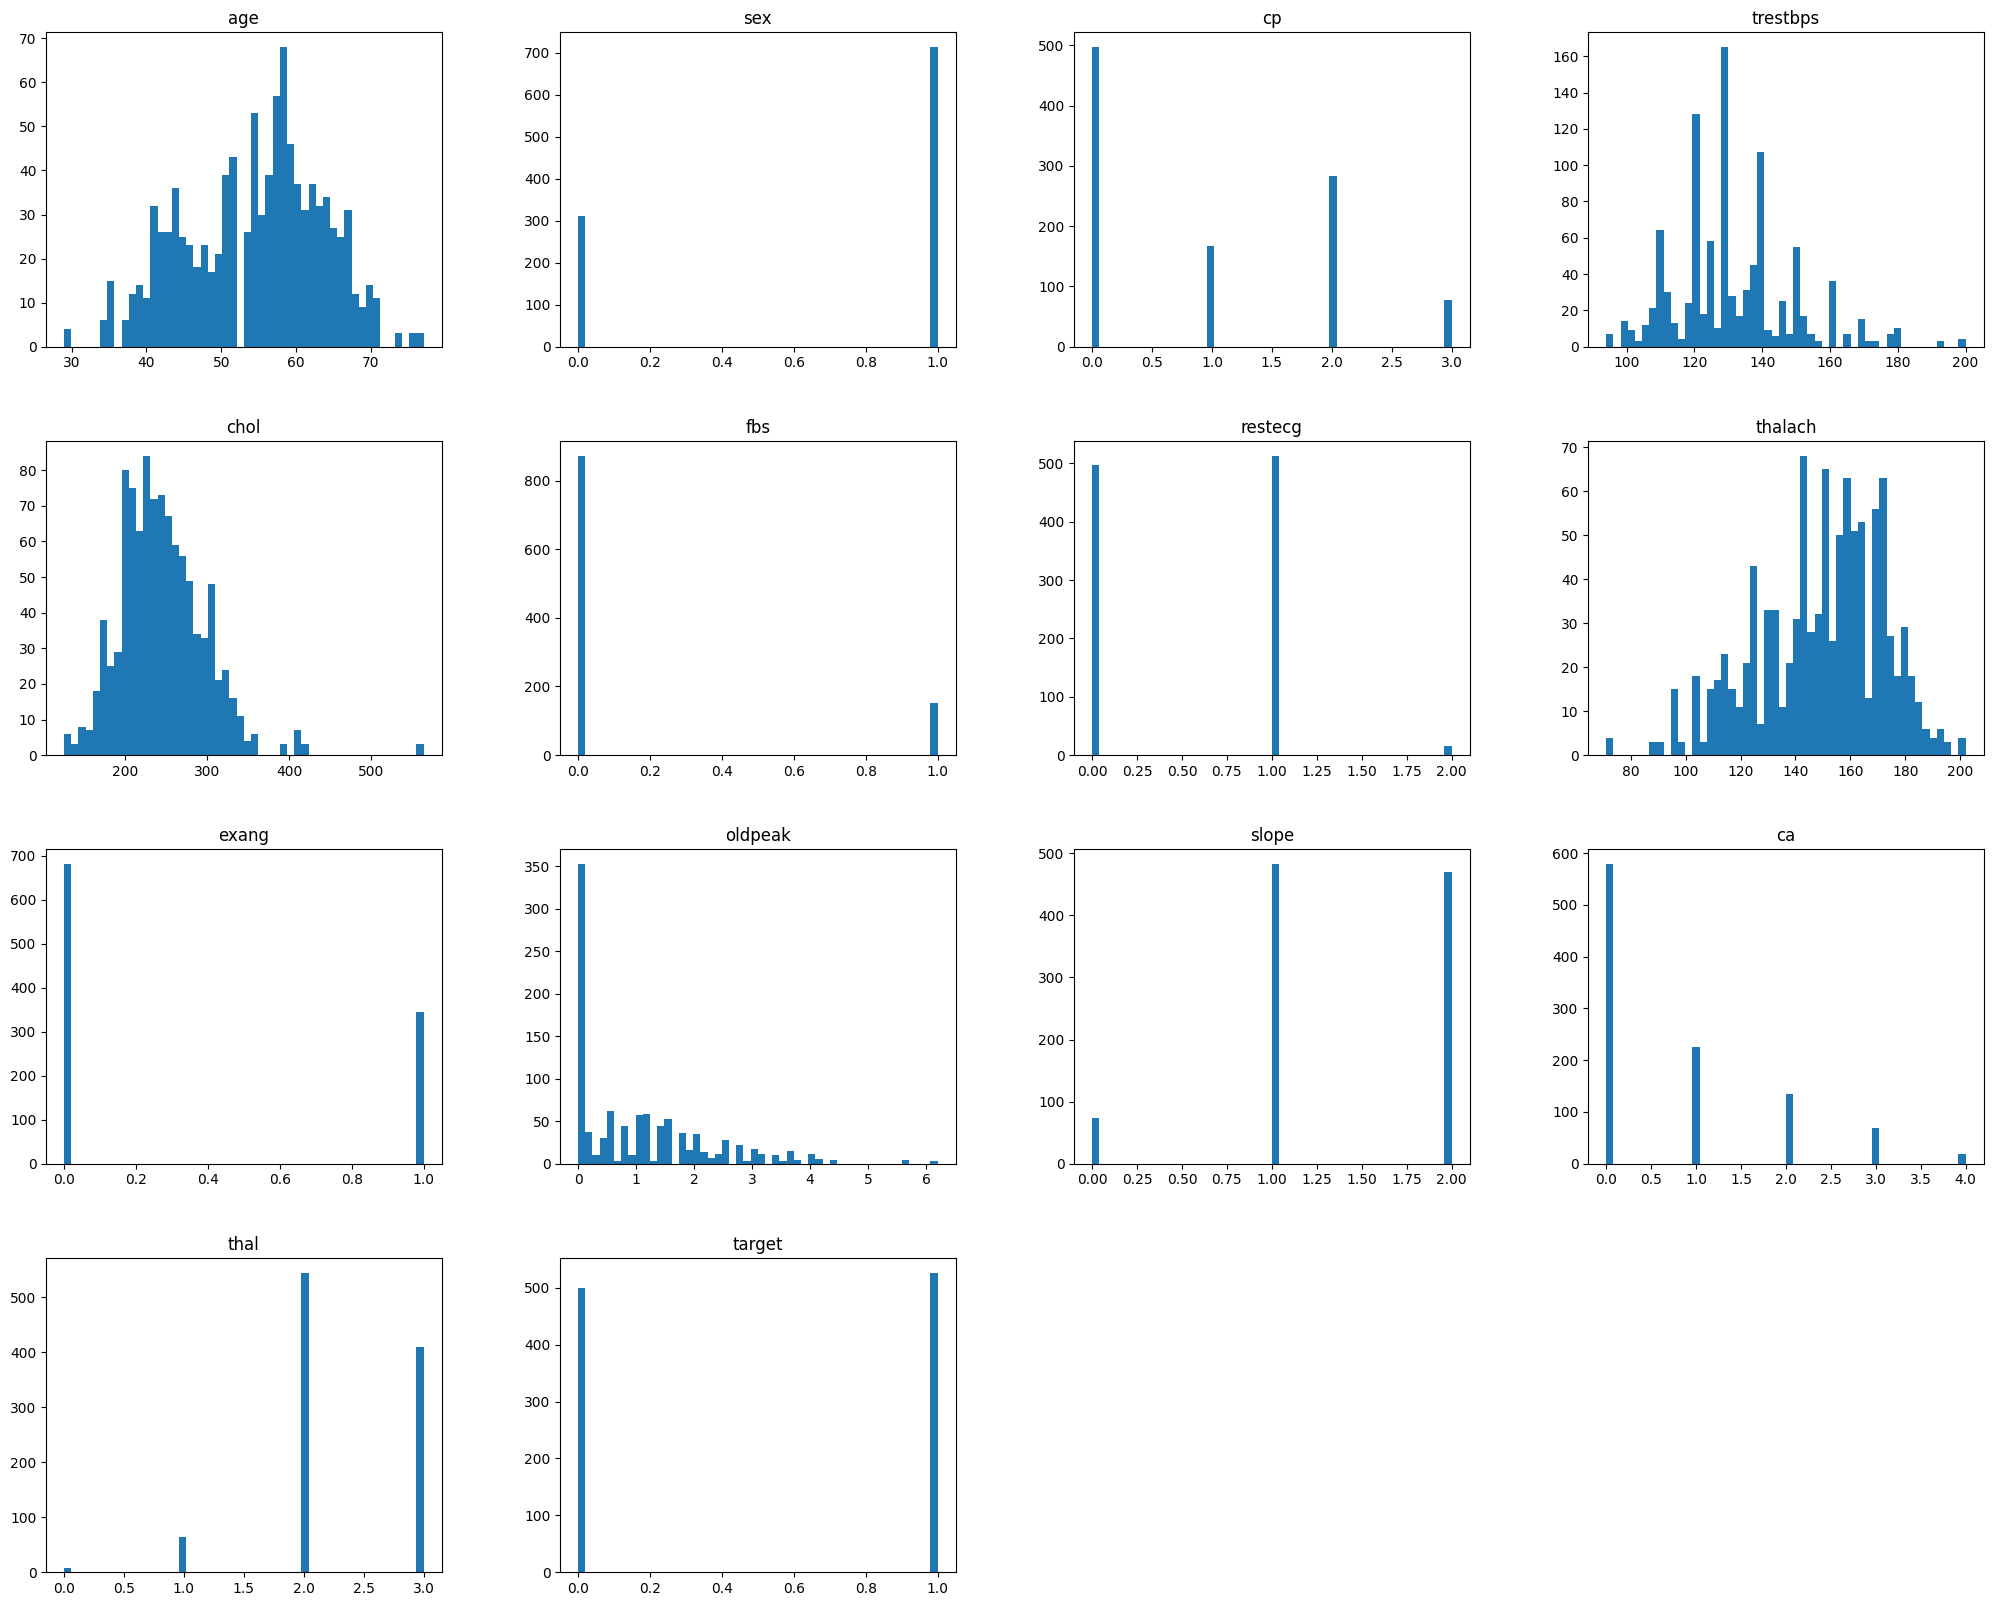

In [18]:
#plotting histogram of all numeric values
#bins represent intervals or ranges (bins = 50 in this line)

df.hist(bins=50, grid = False, figsize=(25,20));

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

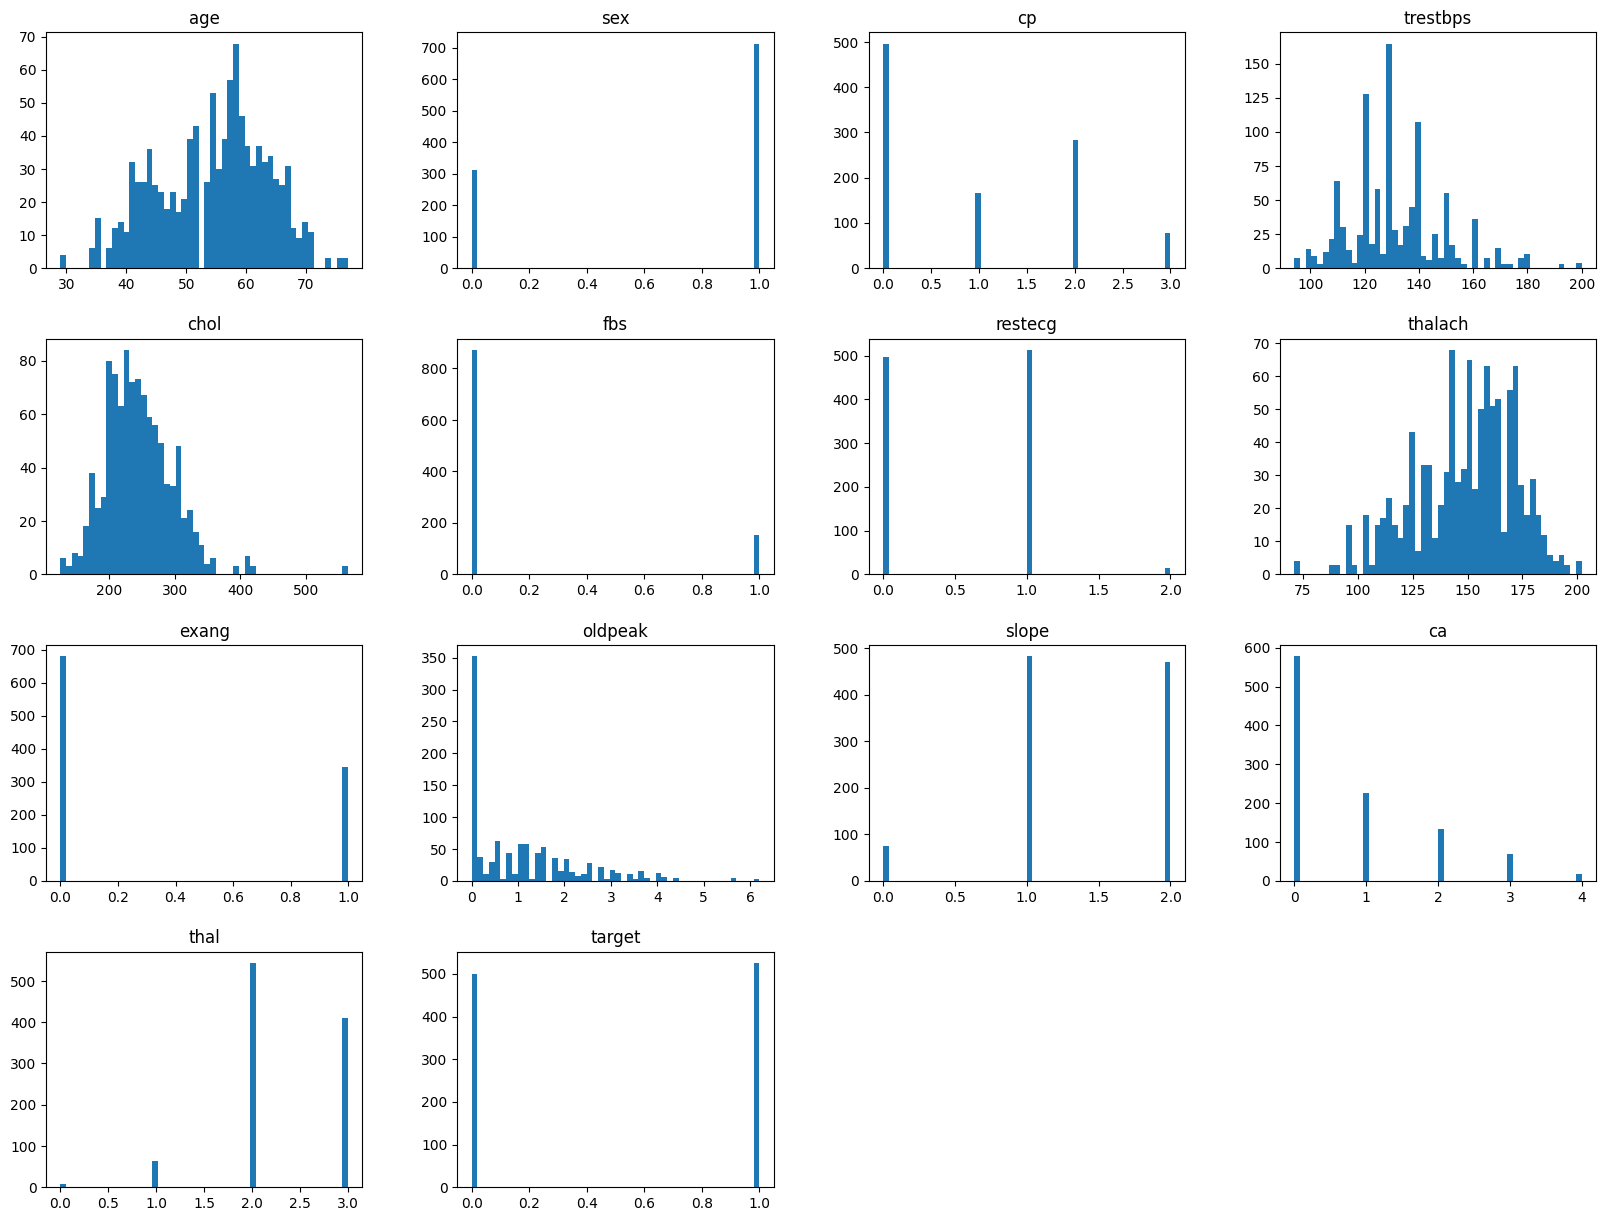

In [22]:
df.hist(bins=50,grid=False,figsize=(20,15))

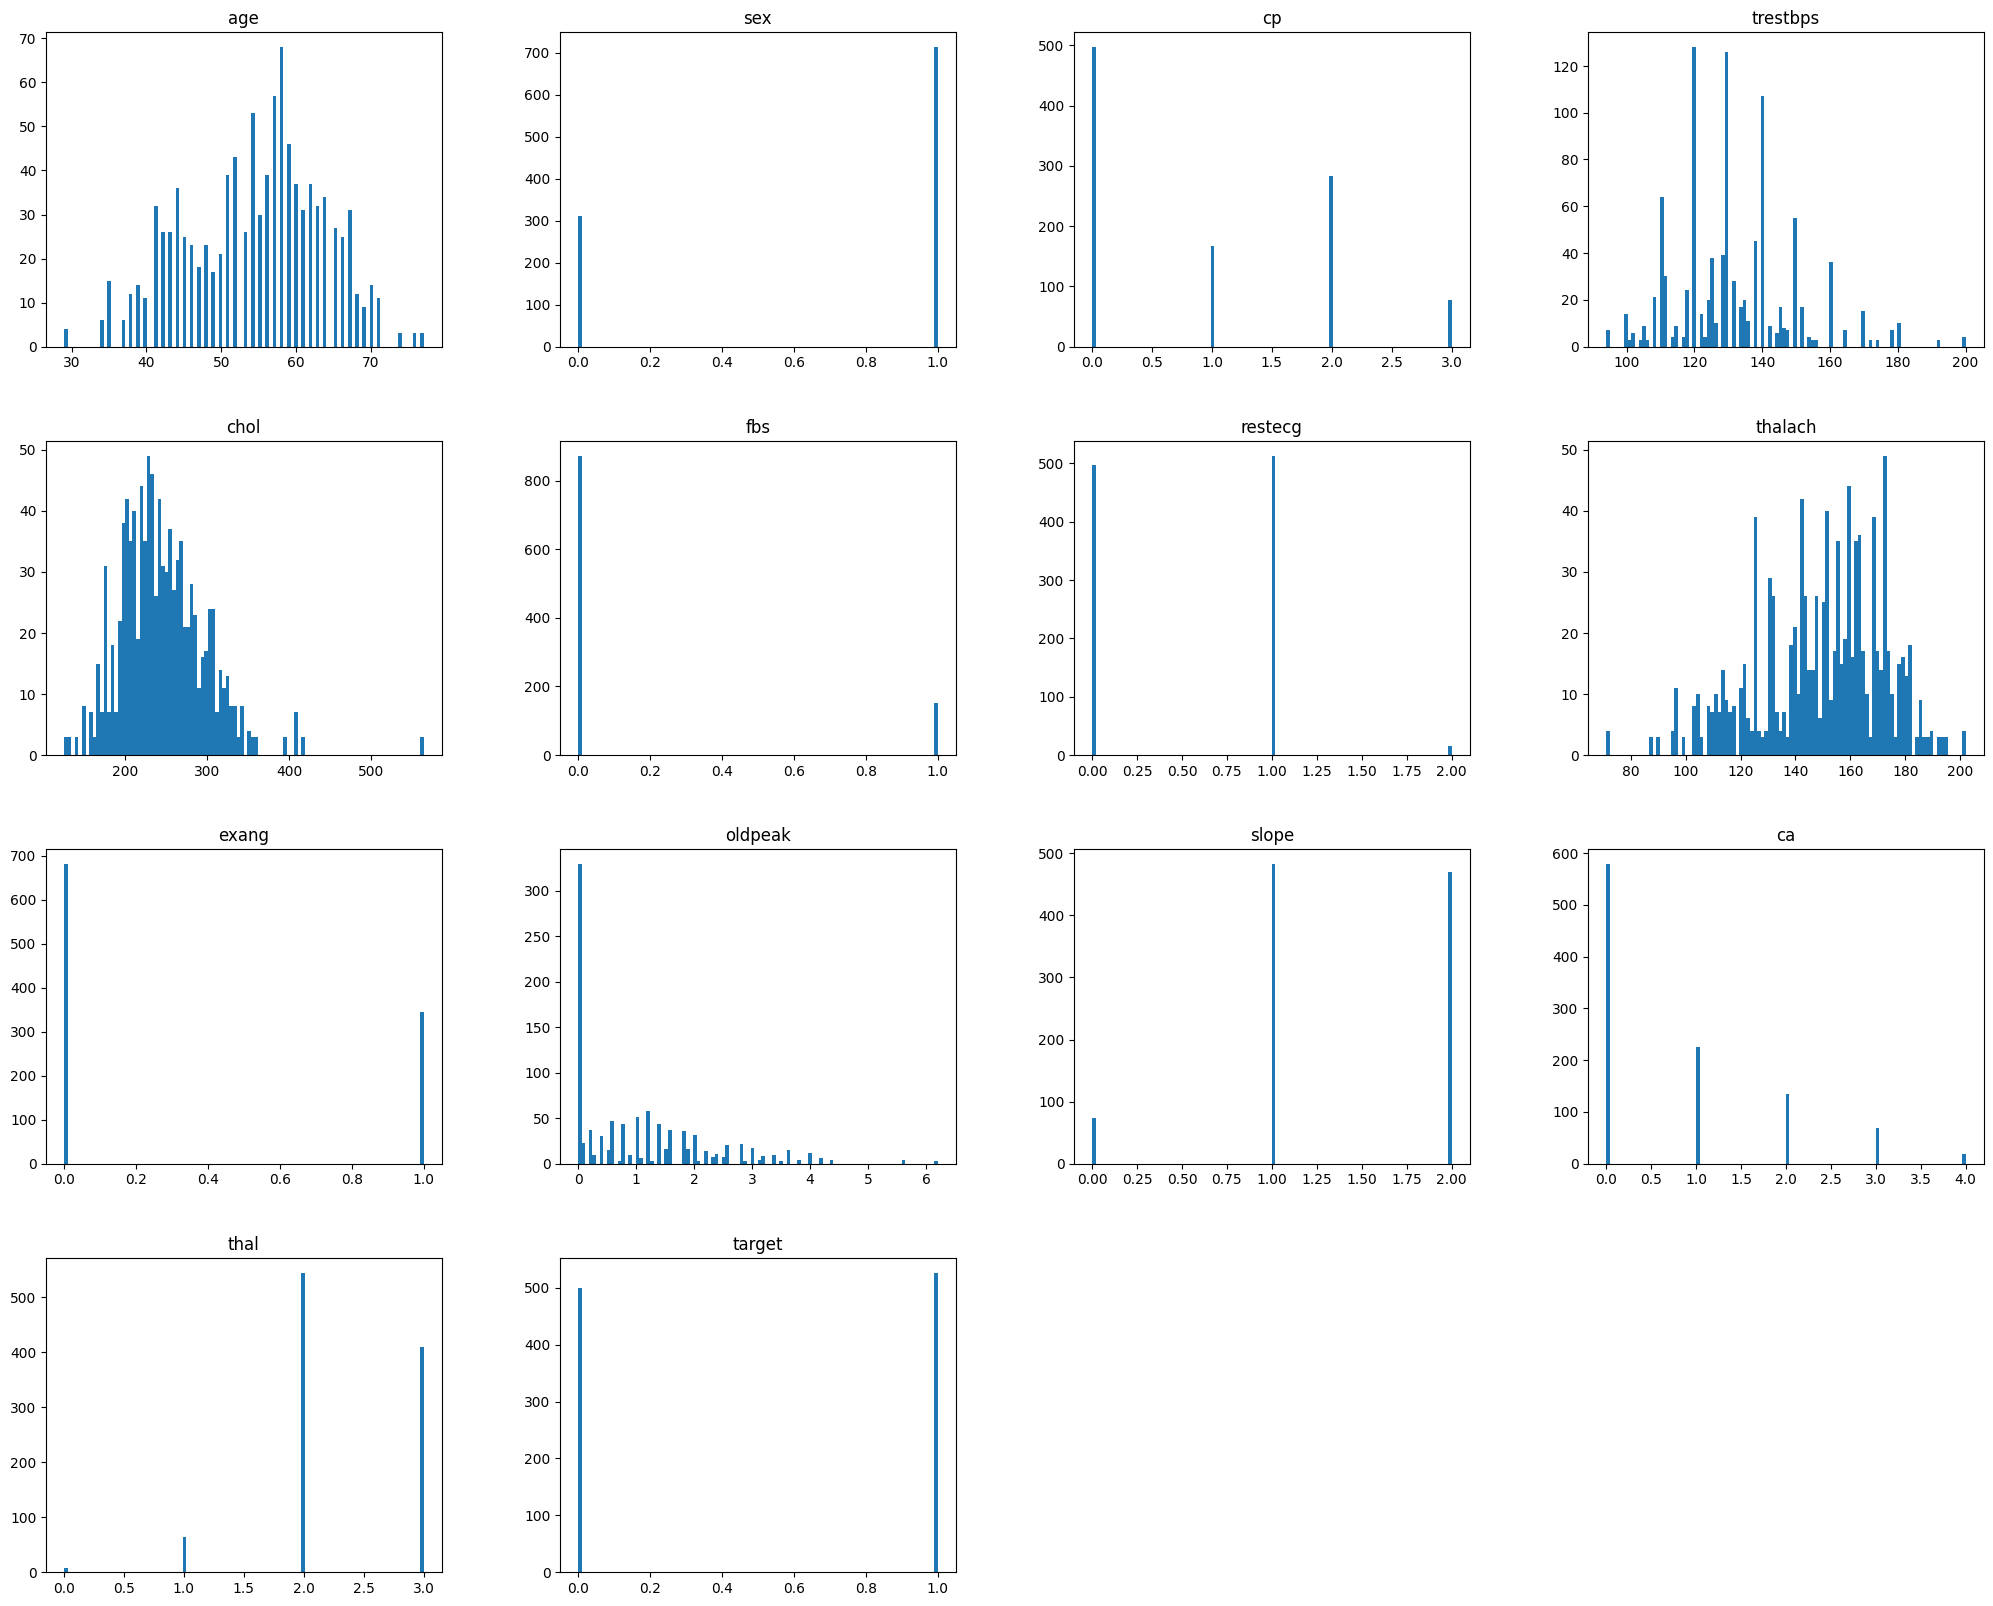

In [19]:
#plotting histogram of all numeric values
#bins represent intervals or ranges (bins = 100 in this line)

df.hist(bins=100, grid = False, figsize=(25,20));

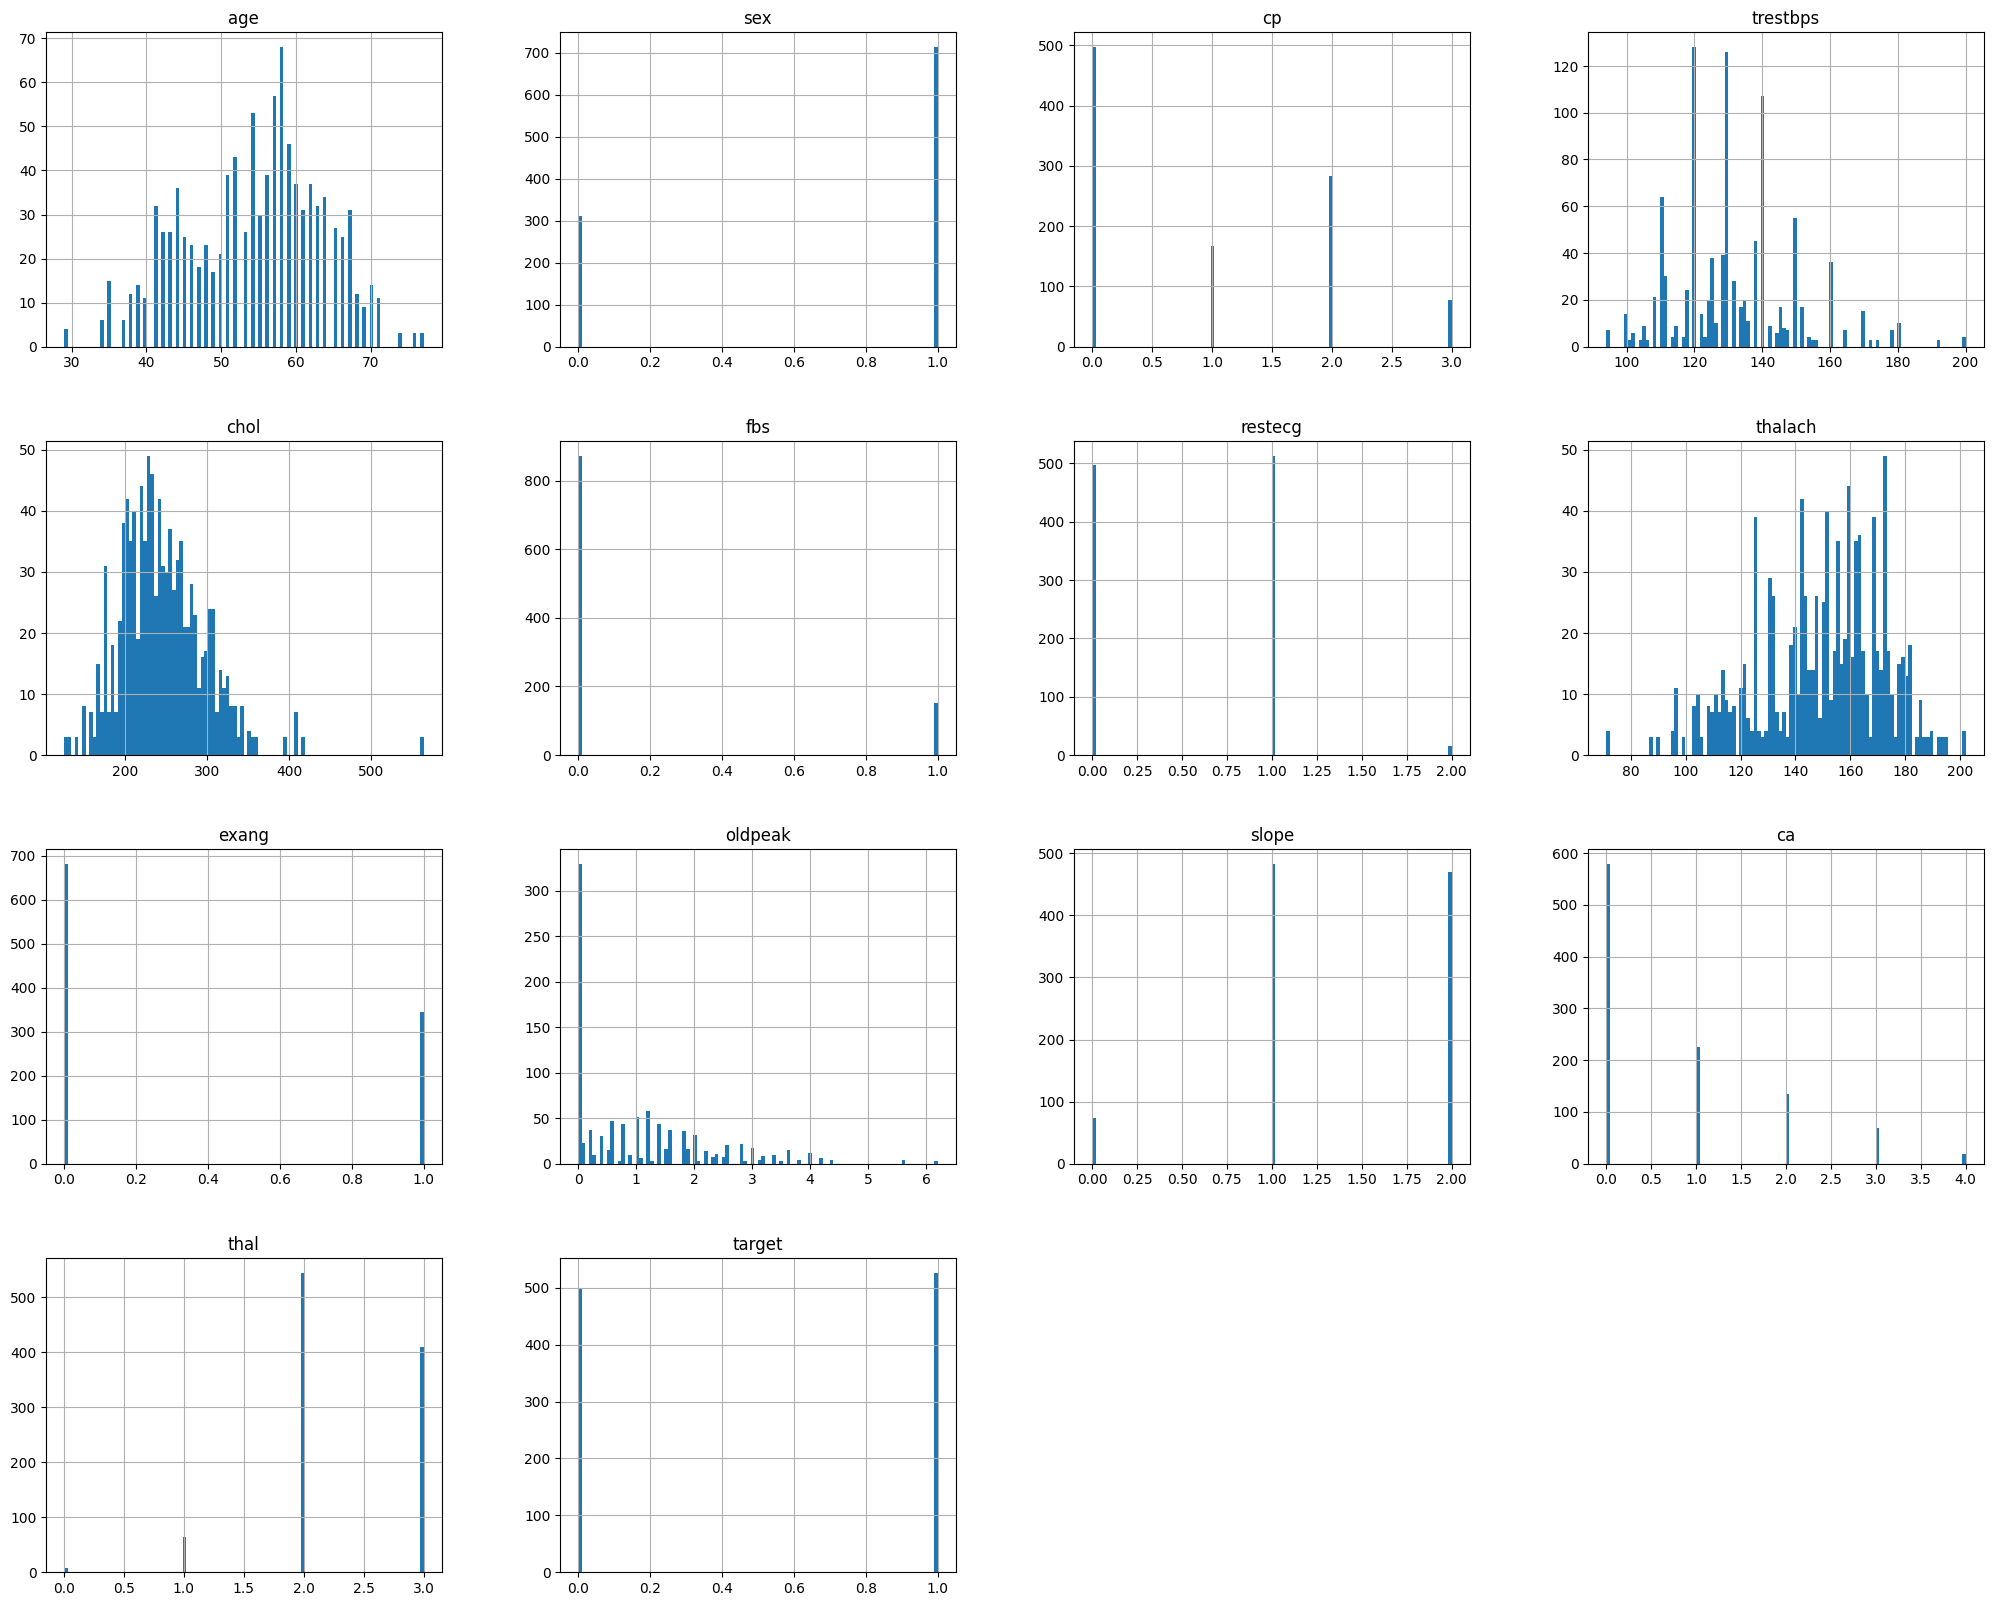

In [20]:
#plotting histogram of all numeric values
#bins represent intervals or ranges (bins = 100 in this line)
#grid shows blocks in background if it is true

df.hist(bins=100, grid = True, figsize=(25,20));

In [21]:
#Generating descriptive statistics.
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [66]:
questions = ["1. How many people have heart disease problem and how many people doesn't have heart problem? ",
             "2. People of which sex has most heart problem?",
             "3. People of which sex has which types of chest pain most?",
             "4. People with which chest pain are most pron to have heart failure?",
             "5. People of which sex has more fasting blood sugar?",
             "6. Which sex of people has what type of resting Electrocardiogram (ECG) most?",
             "7. Which age group has what level of cholesterol?",
             "8. Which age group has what level of blood pressure?"]

questions

["1. How many people have heart disease problem and how many people doesn't have heart problem? ",
 '2. People of which sex has most heart problem?',
 '3. People of which sex has which types of chest pain most?',
 '4. People with which chest pain are most pron to have heart failure?',
 '5. People of which sex has more fasting blood sugar?',
 '6. Which sex of people has what type of resting Electrocardiogram (ECG) most?',
 '7. Which age group has what level of cholesterol?',
 '8. Which age group has what level of blood pressure?']

In [24]:
#Let's find the answer of first question.

#1. How many people have heart disease problem and how many people doesn't have heart problem? ",

#getting the values

df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

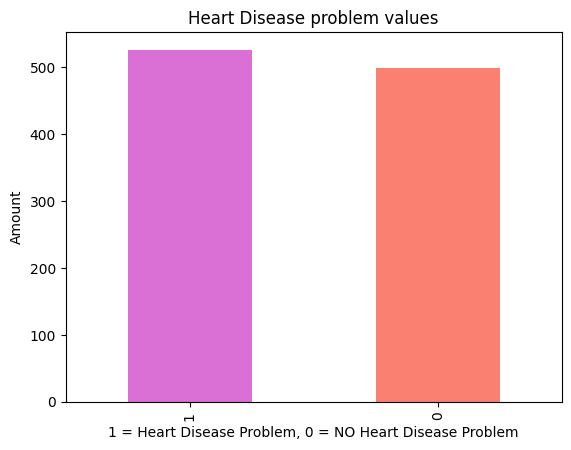

In [25]:
#plotting bar chart.
# 1 = Heart Disease Problem, 0 = NO Heart Disease Problem

df.target.value_counts().plot(kind = 'bar', color=["orchid", "salmon"])
plt.title("Heart Disease problem values")
plt.xlabel("1 = Heart Disease Problem, 0 = NO Heart Disease Problem")
plt.ylabel("Amount");

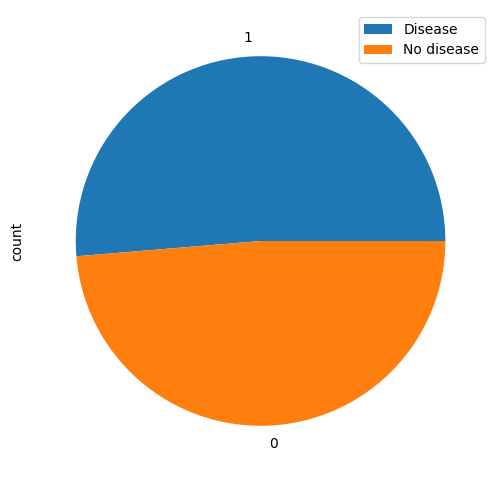

In [26]:
#plotting a pie chart
df.target.value_counts().plot(kind = 'pie', figsize = (8, 6))
plt.legend(["Disease", "No disease"]);

In [27]:
# '0' represrnt 'Female'

# '1' represrnt 'Male'

# '0' represrnt 'No Disease problem'

# '1' represrnt 'Disease problem'

#Now let's check how many 'Male' and 'female' are in the dataset

df.sex.value_counts()

sex
1    713
0    312
Name: count, dtype: int64

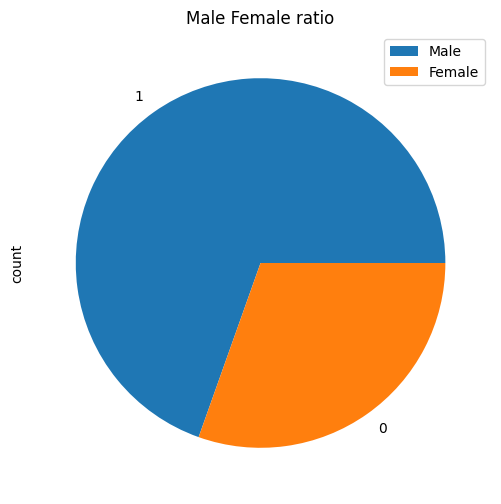

In [28]:
#plotting a pie chart

df.sex.value_counts().plot(kind = 'pie', figsize = (8, 6))
plt.title('Male Female ratio')
plt.legend(['Male', 'Female']);

In [29]:
#Let's find the answer of 2nd question.

#2. People of which sex has most heart problem?

#crastab is use to analysis the relationship between two or more categorical varables
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


Text(0.5, 0, '0 = NO Heart Problem, 1 = Heart Problem')

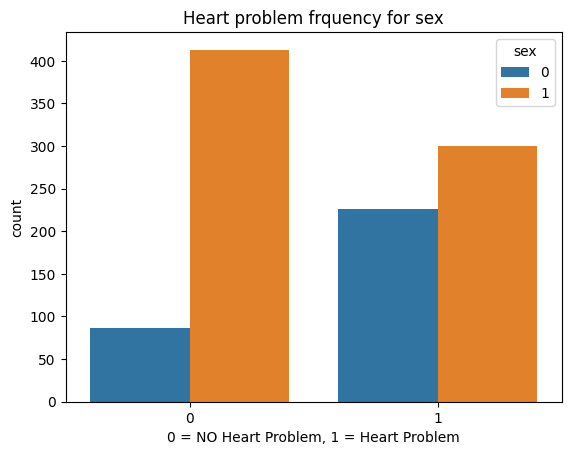

In [30]:
# '0' represrnt 'Female
# '1' represrnt 'Male'

sns.countplot(x = 'target', data = df, hue = 'sex')
plt.title("Heart problem frquency for sex")
plt.xlabel("0 = NO Heart Problem, 1 = Heart Problem")

In [31]:
#Number of male is  more than double in our dataset than female.

#More than '45% male' has heart problem and '75% female' has heart problem.

In [32]:
#Let's find the answer of 3rd question.

#3. People of which sex has which types of chest pain most?

#counting values for different chest pain.
df.cp.value_counts()

cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

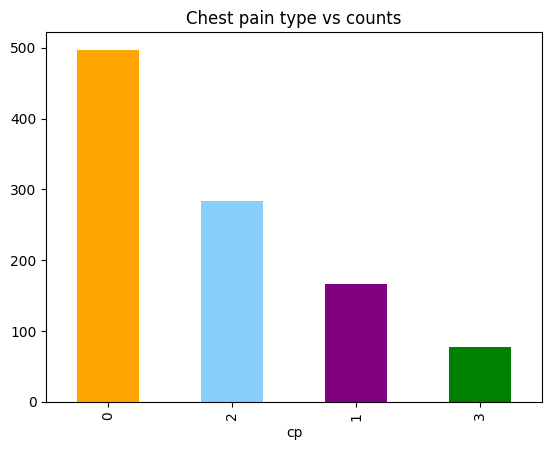

In [33]:
#plotting a bar chart
df.cp.value_counts().plot(kind = 'bar', color=["orange", "lightskyblue", "purple", "green"])
plt.title('Chest pain type vs counts');

In [34]:
pd.crosstab(df.sex, df.cp)

cp,0,1,2,3
sex,,,,
0,133,57,109,13
1,364,110,175,64


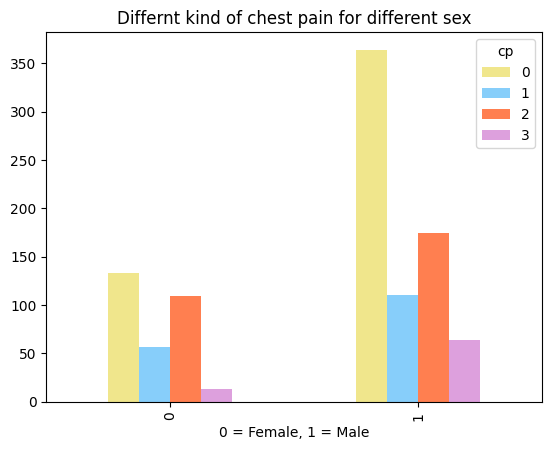

In [35]:
pd.crosstab(df.sex, df.cp).plot(kind = 'bar', color=["khaki", "lightskyblue", "coral", "plum"])
plt.title('Differnt kind of chest pain for different sex')
plt.xlabel('0 = Female, 1 = Male');

In [36]:
#Most of 'Male' has 'type 0' chest pain and least of 'Male' has 'type 4' chest pain.

#In case of 'Female', 'type 0' and 'type 2' persentage is almost same.

In [37]:
#Let's find the answer of 4th question.

#4. People with which chest pain are most pron to have heart failure?

pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


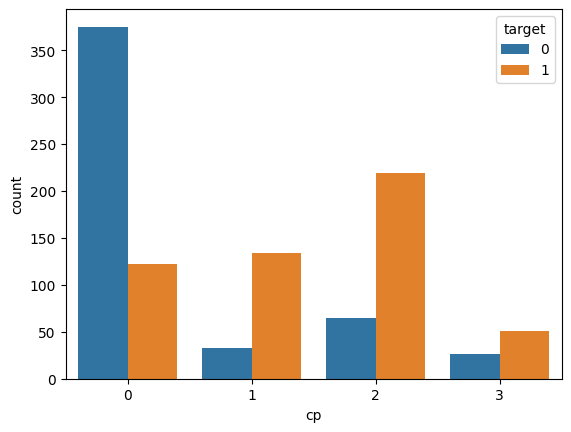

In [38]:
sns.countplot(x = 'cp', data = df, hue = 'target');

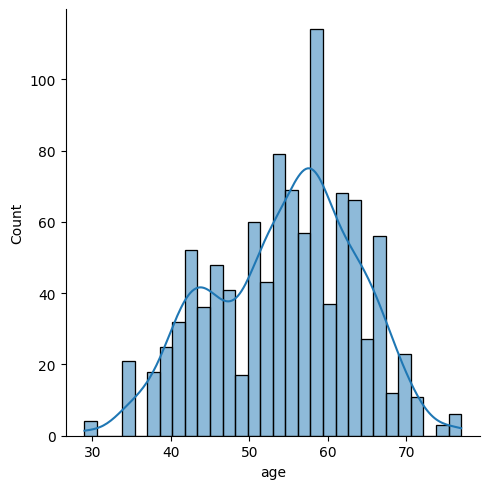

In [39]:
#Most of people who has 'type 0' chest pain has less chance of heart failure.

#And we see the opposite for other types.



#Now let's take at our age column.

#create a distribution plot with normal distribution curve
#displot is an advance plot whish is in seaborn library,
#it combies a histogram,
#it display the distribution of the single numerical value,
#with curves represents'kde' = kernel density estimates,
#and providing like a comprensive view of the data distribution.

sns.displot(x= 'age', data = df, bins = 30, kde = True);


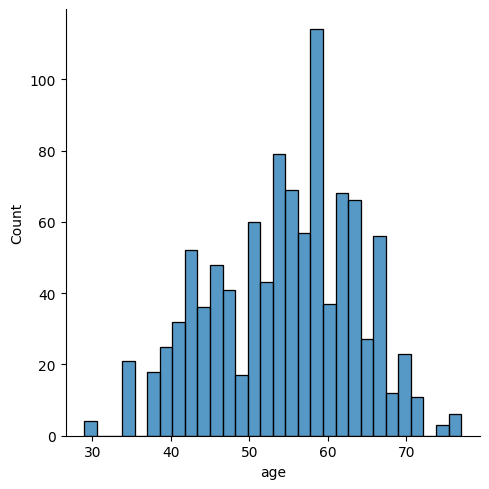

In [40]:
#THIS CODE LINE AND GRAP IS ONLY FOR UNDERSTANING IT AS EXAMPLE, NOT TO TAKE AS IN MAIN PROJECT
#kde = False will remove the curve
sns.displot(x= 'age', data = df, bins = 30, kde = False);

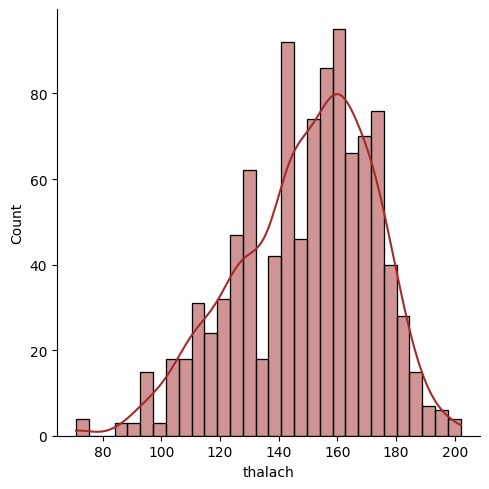

In [41]:
#'58-59' year old people are most in dataset.

#let's plot another distribution plot for 'Maximum Heart Rate'
sns.displot(x= 'thalach', data = df, bins = 30, kde = True, color = 'brown');

In [43]:
#Q5.People of which sex has high glucose concentration in their blood sugar level?

pd.crosstab(df.sex,df.fbs)

fbs,0,1
sex,,
0,270,42
1,602,111


Text(0.5, 0, '0= No FBS   1=FBS')

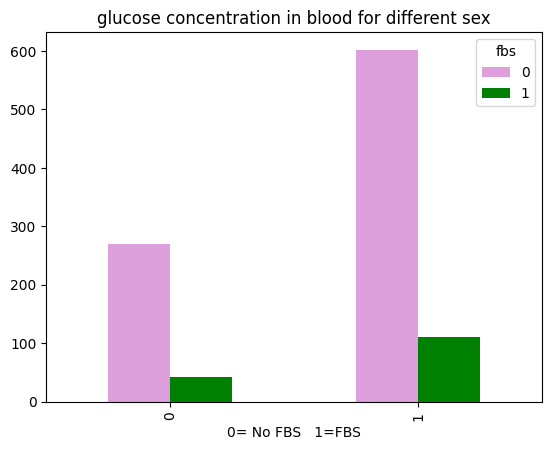

In [45]:
#glucose concentration
pd.crosstab(df.sex,df.fbs).plot(kind='bar',color=['plum','green'])
plt.title("glucose concentration in blood for different sex")
plt.xlabel("0= No FBS   1=FBS")

In [46]:
#Q6.Which sex of people has what type of resting Electrocardiogram (ECG) most?
df.restecg.value_counts()

restecg
1    513
0    497
2     15
Name: count, dtype: int64

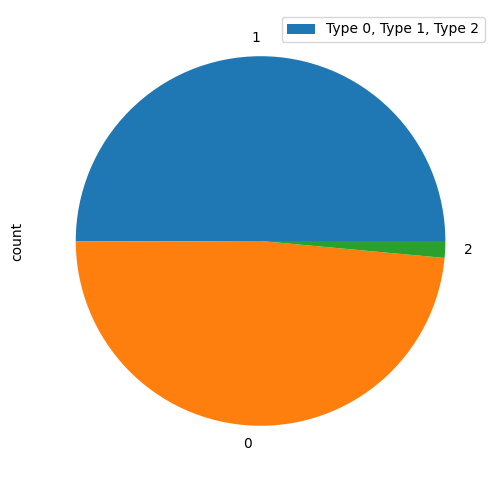

In [47]:
df.restecg.value_counts().plot(kind='pie',figsize=(8,6))
plt.legend(["Type 0, Type 1, Type 2"]);

In [48]:
#Q7.Which age group has what level of cholesterol?
df.chol.value_counts()

chol
204    21
234    21
197    19
212    18
254    17
       ..
164     3
394     3
215     3
160     3
141     3
Name: count, Length: 152, dtype: int64

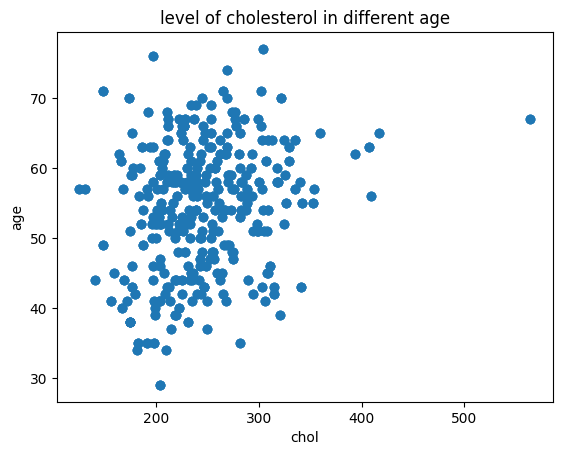

In [50]:
#scatter plot used to obereve relationship between varraibles and uses dots to represent
#scatter plot with age against cholesterol
plt.scatter(df['chol'], df['age'])

#adding title to the plot
plt.title("level of cholesterol in different age")

#setting the x and y y lable
plt.xlabel('chol')
plt.ylabel('age')

#adding the legends
plt.show()

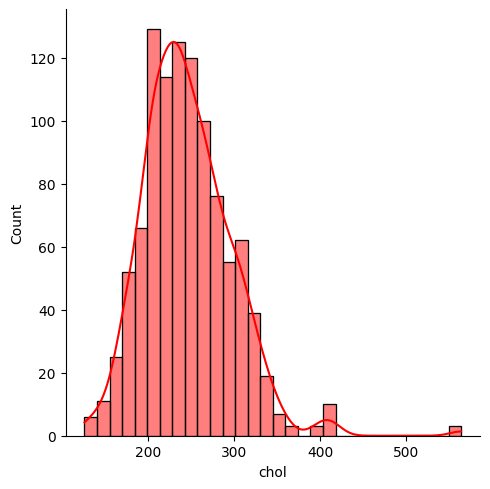

In [56]:
#let's plot another distribution plot for 'cholesterol' from dataset
sns.displot(x= 'chol', data = df, bins = 30, kde = True, color = 'red');

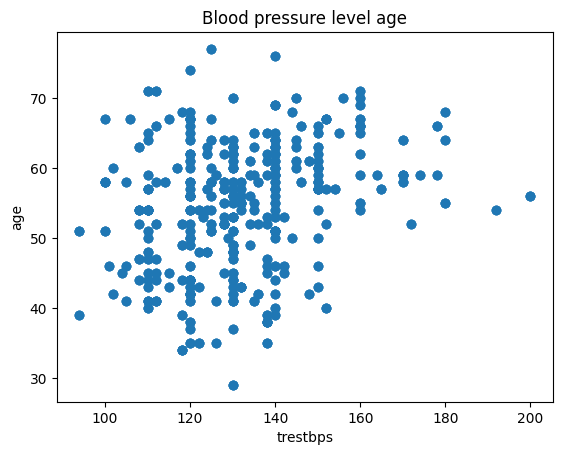

In [65]:
#Q8. Which age group has what level of blood pressure?

#scatter plot with age against blood pressure
plt.scatter(df['trestbps'], df['age'])

#adding title to the plot
plt.title("Blood pressure level age")

#setting the x and y y lable
plt.xlabel('trestbps')
plt.ylabel('age')

#adding the legends
plt.show()

In [67]:
#People with which sex high boood pressure?

pd.crosstab(df.sex, df.trestbps)

trestbps,94,100,101,102,104,105,106,108,110,112,...,160,164,165,170,172,174,178,180,192,200
sex,,,,,,,,,,,,,,,,,,,,,
0,3,3,0,6,0,6,3,10,10,10,...,12,0,0,4,0,3,4,7,0,4
1,4,11,3,0,3,3,0,11,54,20,...,24,3,4,11,3,0,3,3,3,0


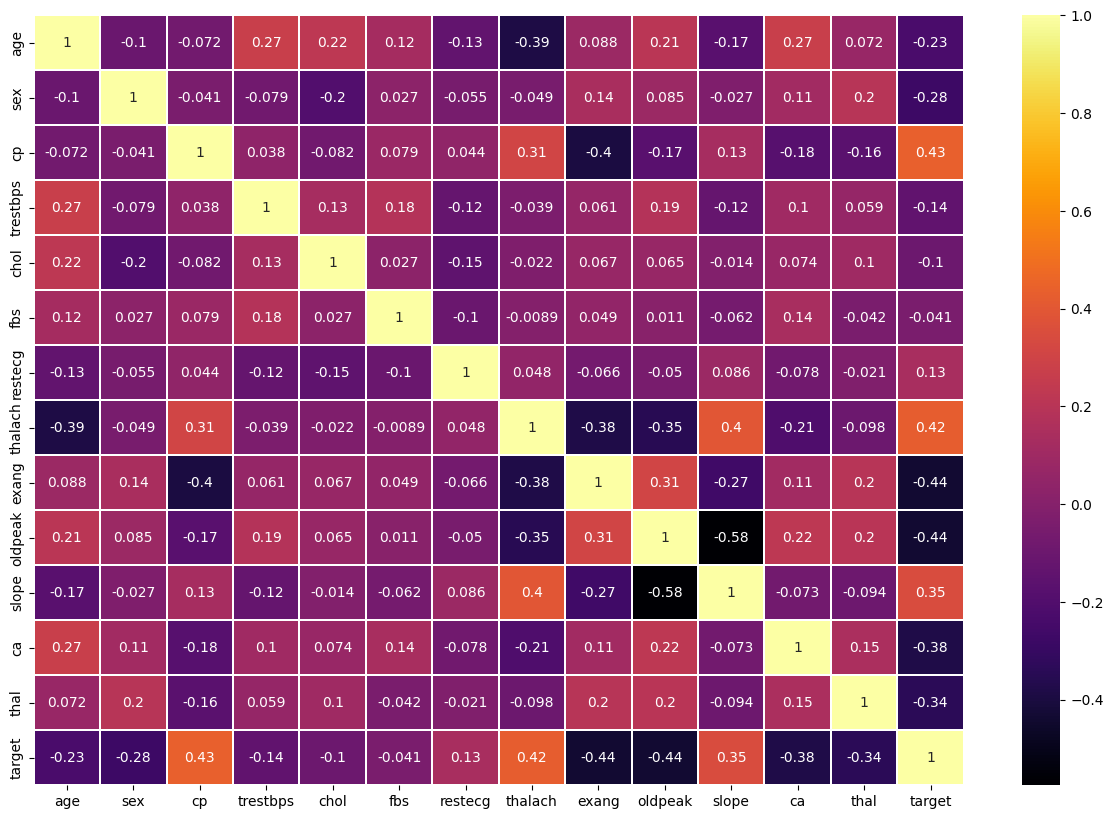

<Figure size 640x480 with 0 Axes>

In [77]:
#Using Machine Learning Algorithm for prediction
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidth=.01,annot=True,cmap="inferno")
plt.show()
plt.savefig('correlationfigure')

In [81]:
# getting locations
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=40)

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Testing the Accuracy for Logistic Regression: 0.8249027237354085
Testing the Sensitivity for Logistic Regression: 0.8545454545454545
Testing the Specificity for Logistic Regression: 0.8027210884353742
Testing the Precision for Logistic Regression: 0.7642276422764228


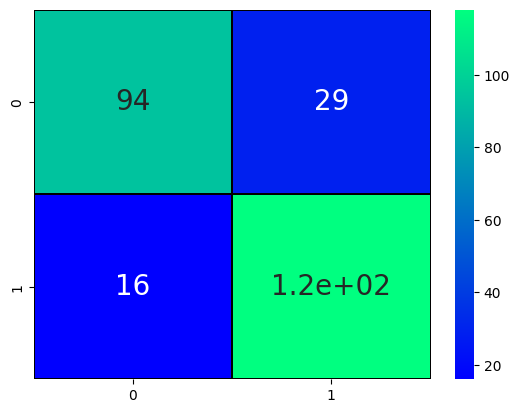

In [84]:
#Logistic Regression

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction1)
cm
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing the Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing the Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing the Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing the Precision for Logistic Regression:',(TP/(TP+FP)))

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.85      0.76      0.81       123
           1       0.80      0.88      0.84       134

    accuracy                           0.82       257
   macro avg       0.83      0.82      0.82       257
weighted avg       0.83      0.82      0.82       257



              precision    recall  f1-score   support

           0       0.93      0.89      0.91       123
           1       0.90      0.94      0.92       134

    accuracy                           0.91       257
   macro avg       0.92      0.91      0.91       257
weighted avg       0.92      0.91      0.91       257

Testing the Accuracy for Decision Tree: 0.914396887159533
Testing the Sensitivity for Decision Tree: 0.9316239316239316
Testing the Specificity for Decision Tree: 0.9
Testing the Precision for Decision Tree: 0.8861788617886179


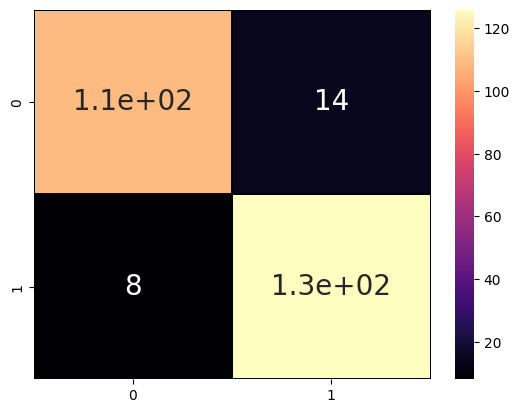

In [88]:
#Decision Tree

from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=5,criterion='entropy')
cv_scores = cross_val_score(tree_model, X, y, cv=10, scoring='accuracy')
m=tree_model.fit(X, y)
prediction=m.predict(X_test)
cm= confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,cmap='magma',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
print(classification_report(y_test, prediction))

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing the Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))
print('Testing the Sensitivity for Decision Tree:',(TP/(TP+FN)))
print('Testing the Specificity for Decision Tree:',(TN/(TN+FP)))
print('Testing the Precision for Decision Tree:',(TP/(TP+FP)))

Testing the Accuracy for Random Forest: 0.9922178988326849
Testing the Sensitivity for Random Forest: 0.984
Testing the Specificity for Random Forest: 1.0
Testing the Precision for Random Forest: 1.0


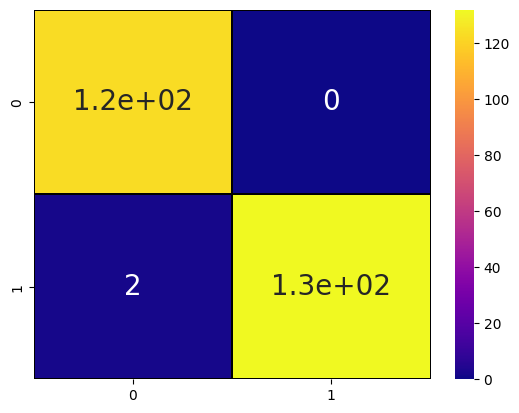

In [89]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8,min_samples_split=5)
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
cm3=confusion_matrix(y_test, prediction3)
sns.heatmap(cm3, annot=True,cmap='plasma',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm3[0][0]
TN=cm3[1][1]
FN=cm3[1][0]
FP=cm3[0][1]

print('Testing the Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))
print('Testing the Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing the Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing the Precision for Random Forest:',(TP/(TP+FP)))

In [90]:
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       123
           1       1.00      0.99      0.99       134

    accuracy                           0.99       257
   macro avg       0.99      0.99      0.99       257
weighted avg       0.99      0.99      0.99       257



Testing the Accuracy for SVM: 0.8132295719844358
Testing the Sensitivity for Random Forest: 0.8504672897196262
Testing the Specificity for Random Forest: 0.7866666666666666
Testing the Precision for Random Forest: 0.7398373983739838


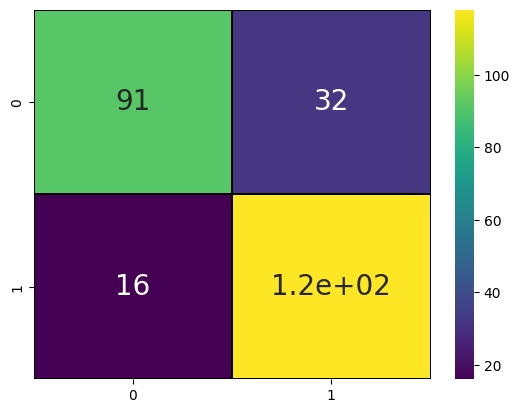

In [92]:
  from sklearn.svm import SVC
  svm=SVC(C=12,kernel='linear')
  model4=svm.fit(X_train,y_train)
  prediction4=model4.predict(X_test)
  cm4= confusion_matrix(y_test,prediction4)
  sns.heatmap(cm4, annot=True,cmap='viridis',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
  TP=cm4[0][0]
  TN=cm4[1][1]
  FN=cm4[1][0]
  FP=cm4[0][1]
  
  print('Testing the Accuracy for SVM:',(TP+TN)/(TP+TN+FN+FP))
  print('Testing the Sensitivity for Random Forest:',(TP/(TP+FN)))
  print('Testing the Specificity for Random Forest:',(TN/(TN+FP)))
  print('Testing the Precision for Random Forest:',(TP/(TP+FP)))

In [97]:
#As we can see that the accuracy of Random Forest Algorithm is highstest i.e, 99%, 
#We use this algorithm for the heart failure prediction

input=(52 ,1, 0	,125, 212, 0, 1, 168, 0, 1, 2, 23, 0)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=tree_model.predict(input_reshaped)
if(pre1==1): 
  print("The patient seemingly have chances of heart failure :( ")
else:
  print("The patient seemingly have NO heart failure chances ^u^")

The patient seemingly have NO heart failure chances ^u^


C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [104]:
input=(54,1,0,120,188,0,1,113,1,1.4,1,1,3)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=tree_model.predict(input_reshaped)
if(pre1==1): 
  print("The patient seemingly have chances of heart failure :( ")
else:
  print("The patient seemingly have NO heart failure chances ^u^ ")

The patient seemingly have NO heart failure chances ^u^ 


C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [98]:
input=(58,1,2,140,211,1,0,165,0,0,2,0,2)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=rfc.predict(input_reshaped)
if(pre1==1): 
 print("The patient seemingly have chances of heart failure :( ")
else:
  print("The patient seemingly have NO heart failure chances ^u^ ")


The patient seemingly have chances of heart failure :( 


C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [103]:
input=(34, 0, 1, 118, 210, 0, 1, 192, 0, 0o7, 2, 2, 1)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=rfc.predict(input_reshaped)
if(pre1==1): 
 print("The patient seemingly have chances of heart failure :( ")
else:
  print("The patient seemingly have NO heart failure chances ^u^ ")


The patient seemingly have chances of heart failure :( 


C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [106]:


input=(54,1,0,124,266,0,0,109,1,2.2,1,1, 0)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=rfc.predict(input_reshaped)
if(pre1==1): 
 print("The patient seemingly have chances of heart failure :( ")
else:
  print("The patient seemingly have NO heart failure chances ^u^ ")


The patient seemingly have NO heart failure chances ^u^ 


C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
